# this is a tutorial

In [ ]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0)

In [2]:
def show_tensor_images(image_tensor, num_images=9, size=(1, 28, 28)):
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=int(num_images**0.5))
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

In [3]:
def get_generator_block(input_dim, output_dim):
    return nn.Sequential(
        nn.Linear(input_dim, output_dim),
        nn.BatchNorm1d(output_dim),
        nn.ReLU(inplace=True)
    )

In [4]:
class Generator(nn.Module):
    def __init__(self, z_dim=10, im_dim=784, hidden_dim=128):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            get_generator_block(z_dim, hidden_dim),
            get_generator_block(hidden_dim, hidden_dim * 2),
            get_generator_block(hidden_dim * 2, hidden_dim * 4),
            get_generator_block(hidden_dim * 4, hidden_dim * 8),
            nn.Linear(hidden_dim * 8, im_dim),
            nn.Sigmoid()
        )
    def forward(self, noise):
        return self.gen(noise)

In [5]:
def get_noise(n_samples, z_dim, device='cpu'):
    return torch.randn(n_samples, z_dim, device=device)

In [6]:
def get_discriminator_block(input_dim, output_dim):
    return nn.Sequential(
         nn.Linear(input_dim, output_dim), #Layer 1
         nn.LeakyReLU(0.2, inplace=True)
    )

In [7]:
class Discriminator(nn.Module):
    def __init__(self, im_dim=784, hidden_dim=128):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            get_discriminator_block(im_dim, hidden_dim * 4),
            get_discriminator_block(hidden_dim * 4, hidden_dim * 2),
            get_discriminator_block(hidden_dim * 2, hidden_dim),
            nn.Linear(hidden_dim, 1)
        )
    def forward(self, image):
        return self.disc(image)

In [8]:
criterion = nn.BCEWithLogitsLoss()
n_epochs = 200
z_dim = 64
display_step = 2000
batch_size = 128
lr = 0.00001
device = "cuda" if torch.cuda.is_available() else "cpu"

In [9]:
dataloader = DataLoader(
    MNIST('.', download=True, transform=transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=True)

In [10]:
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc = Discriminator().to(device)
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

In [11]:
def get_disc_loss(gen, disc, criterion, real, num_images, z_dim, device):
    fake_noise = get_noise(num_images, z_dim, device=device)
    fake = gen(fake_noise)
    disc_fake_pred = disc(fake.detach())
    disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))
    disc_real_pred = disc(real)
    disc_real_loss = criterion(disc_real_pred, torch.ones_like(disc_real_pred))
    disc_loss = (disc_fake_loss + disc_real_loss) / 2
    return disc_loss

In [12]:
def get_gen_loss(gen, disc, criterion, num_images, z_dim, device):
    fake_noise = get_noise(num_images, z_dim, device=device)
    fake = gen(fake_noise)
    disc_fake_pred = disc(fake)
    gen_loss = criterion(disc_fake_pred, torch.ones_like(disc_fake_pred))
    return gen_loss

Step 0: Generator loss: 0.00034270429611206053, discriminator loss: 0.0003461205959320068


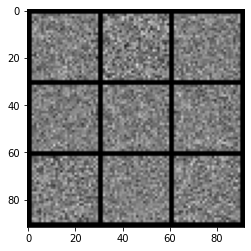

Step 2000: Generator loss: 1.6955682223439226, discriminator loss: 0.27252693212032325


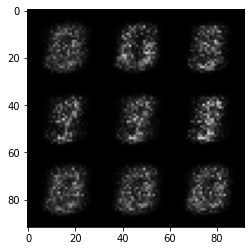

Step 4000: Generator loss: 2.2368921062350253, discriminator loss: 0.14842313060164428


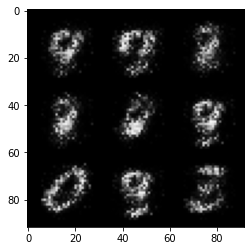

Step 6000: Generator loss: 3.341693218111988, discriminator loss: 0.08927707197330895


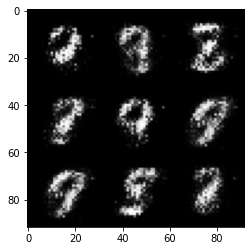

Step 8000: Generator loss: 4.023670446753505, discriminator loss: 0.055192598232999414


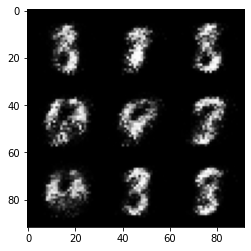

Step 10000: Generator loss: 4.000550287723541, discriminator loss: 0.06309179145377124


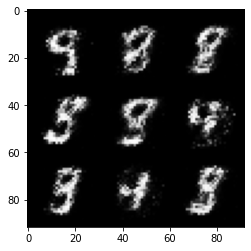

Step 12000: Generator loss: 3.8618851252794317, discriminator loss: 0.07208702339231954


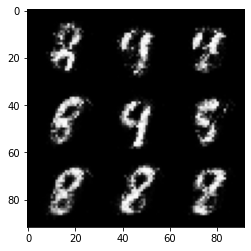

Step 14000: Generator loss: 3.9005314412116974, discriminator loss: 0.0856554073616862


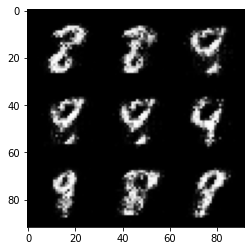

Step 16000: Generator loss: 3.6169175269603735, discriminator loss: 0.11185366213694223


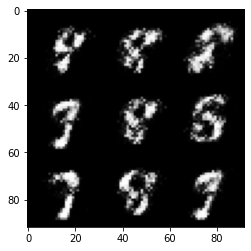

Step 18000: Generator loss: 3.4731462987661303, discriminator loss: 0.12103799390979106


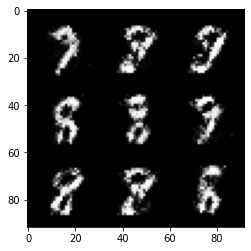

Step 20000: Generator loss: 3.3287915961742414, discriminator loss: 0.14464904637634754


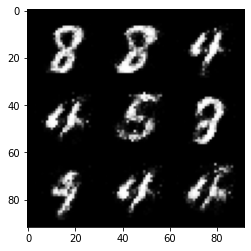

Step 22000: Generator loss: 3.160525367856026, discriminator loss: 0.15597451241314395


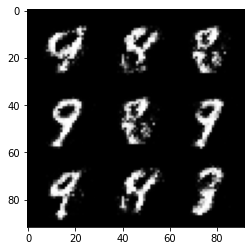

Step 24000: Generator loss: 3.0912563116550467, discriminator loss: 0.17608809247612972


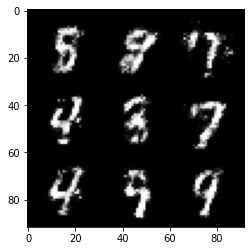

Step 26000: Generator loss: 2.827414359807964, discriminator loss: 0.207560047667473


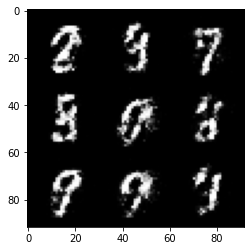

Step 28000: Generator loss: 2.698794445395468, discriminator loss: 0.22683814800903215


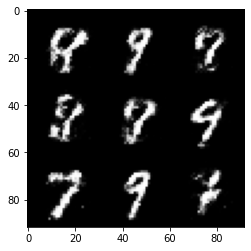

Step 30000: Generator loss: 2.613737283349032, discriminator loss: 0.22407789727672922


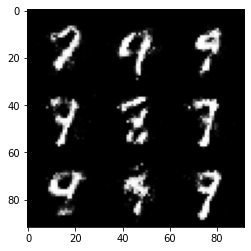

Step 32000: Generator loss: 2.492939369320873, discriminator loss: 0.2466690649017692


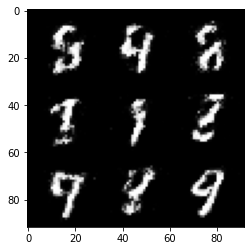

Step 34000: Generator loss: 2.4854107404947245, discriminator loss: 0.23672632214427022


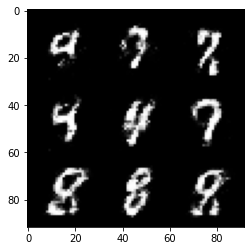

Step 36000: Generator loss: 2.439070219397543, discriminator loss: 0.24384745467454172


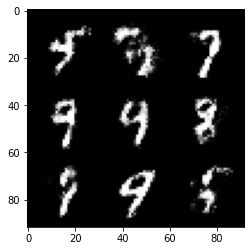

Step 38000: Generator loss: 2.354482377588749, discriminator loss: 0.26674118656665063


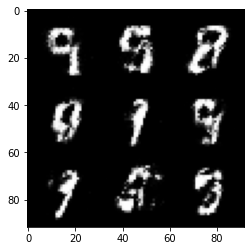

Step 40000: Generator loss: 2.2772006900906554, discriminator loss: 0.28038002752512714


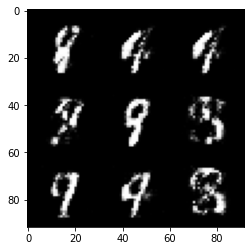

Step 42000: Generator loss: 2.0993619622588224, discriminator loss: 0.3071086118519307


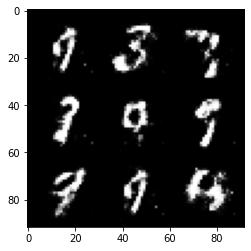

Step 44000: Generator loss: 2.0653640486001947, discriminator loss: 0.3050629733949897


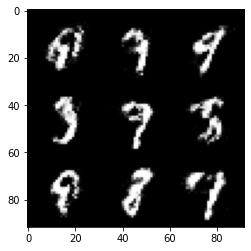

Step 46000: Generator loss: 1.988122811973094, discriminator loss: 0.31930475610494496


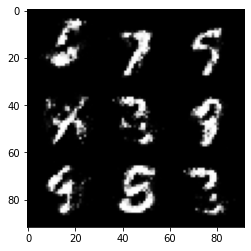

Step 48000: Generator loss: 1.9639743115305908, discriminator loss: 0.3230999507308004


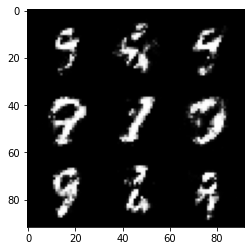

Step 50000: Generator loss: 2.0276733433008225, discriminator loss: 0.3065182038992645


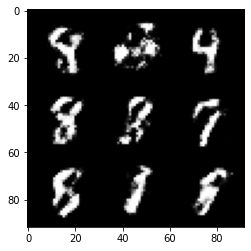

Step 52000: Generator loss: 2.0062426278591166, discriminator loss: 0.3077054776251314


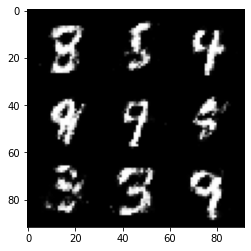

Step 54000: Generator loss: 1.8295899502635027, discriminator loss: 0.3568687802180643


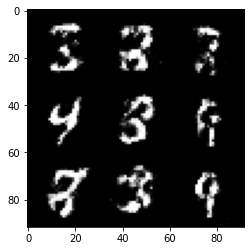

Step 56000: Generator loss: 1.7621464336514487, discriminator loss: 0.35889874944090855


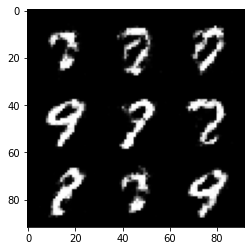

Step 58000: Generator loss: 1.6717461519837389, discriminator loss: 0.387467604592442


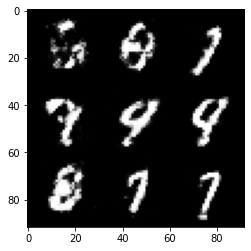

Step 60000: Generator loss: 1.6796604028344173, discriminator loss: 0.37988593809306653


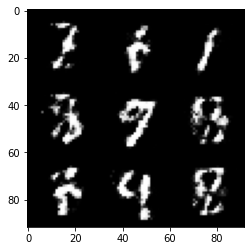

Step 62000: Generator loss: 1.6355198229551284, discriminator loss: 0.39746243196725817


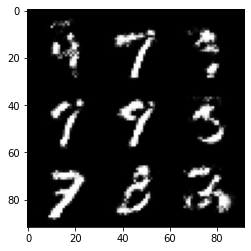

Step 64000: Generator loss: 1.5880057313442217, discriminator loss: 0.3984279072284692


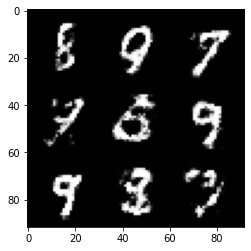

Step 66000: Generator loss: 1.5978174753189112, discriminator loss: 0.39243776245415196


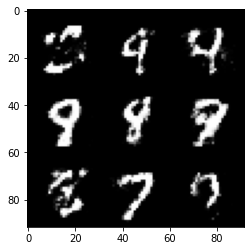

Step 68000: Generator loss: 1.5332123410105725, discriminator loss: 0.41686571717262244


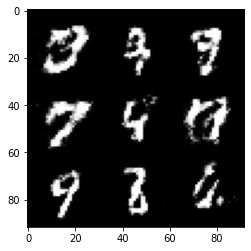

Step 70000: Generator loss: 1.4830726100206384, discriminator loss: 0.4303453943580384


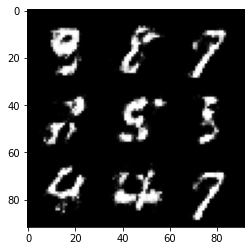

Step 72000: Generator loss: 1.389942281424997, discriminator loss: 0.4502894336879243


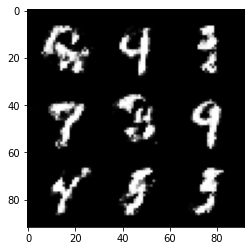

Step 74000: Generator loss: 1.3973725674152342, discriminator loss: 0.4407230115383866


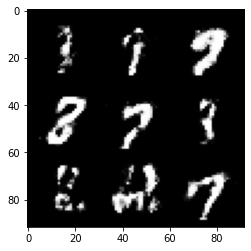

Step 76000: Generator loss: 1.4509021832942968, discriminator loss: 0.4285316620767123


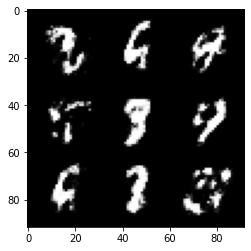

Step 78000: Generator loss: 1.3910607787966742, discriminator loss: 0.44664055831730415


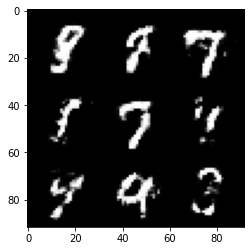

Step 80000: Generator loss: 1.427509533584117, discriminator loss: 0.4349630487412224


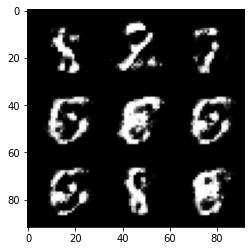

Step 82000: Generator loss: 1.4253135200142826, discriminator loss: 0.4371489254832257


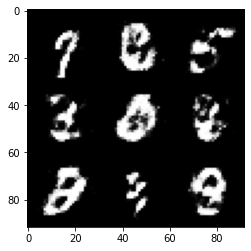

Step 84000: Generator loss: 1.4690033760666856, discriminator loss: 0.42765919293463145


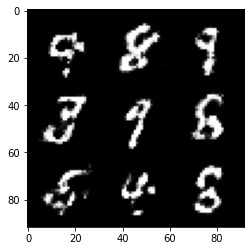

Step 86000: Generator loss: 1.414722854554652, discriminator loss: 0.44346480914950376


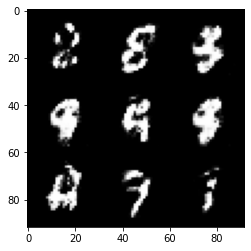

Step 88000: Generator loss: 1.3356967045664783, discriminator loss: 0.45430255034565986


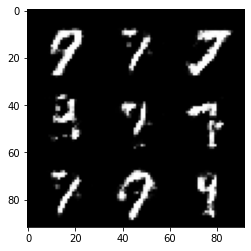

Step 90000: Generator loss: 1.3162471711635597, discriminator loss: 0.46839609302580404


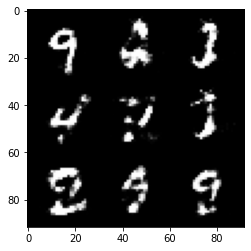

Step 92000: Generator loss: 1.405305320322514, discriminator loss: 0.4411507761031387


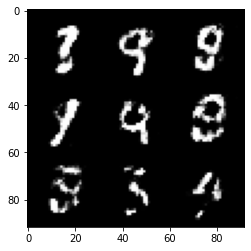

In [13]:
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
gen_loss = False
for epoch in tqdm(range(n_epochs)):
    for real, _ in dataloader:
        cur_batch_size = len(real)
        real = real.view(cur_batch_size, -1).to(device)
        disc_opt.zero_grad()
        disc_loss = get_disc_loss(gen, disc, criterion, real, cur_batch_size, z_dim, device)
        disc_loss.backward(retain_graph=True)
        disc_opt.step()
        gen_opt.zero_grad()
        gen_loss = get_gen_loss(gen, disc, criterion, cur_batch_size, z_dim, device)
        gen_loss.backward()
        gen_opt.step()
        mean_discriminator_loss += disc_loss.item() / display_step
        mean_generator_loss += gen_loss.item() / display_step
        if cur_step % display_step == 0 and cur_step >= 0:
            print(f"Step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
            fake_noise = get_noise(cur_batch_size, z_dim, device=device)
            fake = gen(fake_noise)
            show_tensor_images(fake)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1